In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Turimi duomenys apie oro taršą, laimės indeksą ir gyvenimo trukmę. Nustatyti, ar egzistuoja ryšys tarp oro taršos, laimės indekso ir vidutinės gyvenimo trukmės.


In [57]:
happ_tarsa = pd.read_csv('happy.csv', sep=';')
trukme = pd.read_csv('life-expectancy.csv')

In [58]:
trukme_laikot = trukme[trukme['Year'].isin([2013, 2014, 2015, 2016, 2017, 2018])]
trukmefin = trukme_laikot[trukme_laikot['Code'] == 'FIN']['Life expectancy']
trukmeden = trukme_laikot[trukme_laikot['Code'] == 'DNK']['Life expectancy']
trukmenor = trukme_laikot[trukme_laikot['Code'] == 'NOR']['Life expectancy']
trukmeltu = trukme_laikot[trukme_laikot['Code'] == 'LTU']['Life expectancy']
trukmelat = trukme_laikot[trukme_laikot['Code'] == 'LVA']['Life expectancy']
trukmeest = trukme_laikot[trukme_laikot['Code'] == 'EST']['Life expectancy']

In [59]:
trukme_tarp = [trukmefin,trukmeden,trukmenor,trukmeltu,trukmelat,trukmeest]
trukme_sar = [item for tarpinis in trukme_tarp for item in tarpinis]
happ_tarsa['Gyv. trukmė'] = trukme_sar

In [60]:
happ_tarsa.head(10)

Year  Country  Happiness index  Pollution  Gyv. trukmė
0  2013  Finland             7.39       41.8       80.799
1  2014  Finland             7.40       38.8       81.002
2  2015  Finland             7.41       44.0       81.196
3  2016  Finland             7.41       41.6       81.382
4  2017  Finland             7.47       41.8       81.561
5  2018  Finland             7.63       40.2       81.736
6  2013  Denmark             7.69       58.6       80.171
7  2014  Denmark             7.50       61.6       80.342
8  2015  Denmark             7.53       60.0       80.475
9  2016  Denmark             7.53       55.6       80.583

In [61]:
happ_tarsa.corr()
# Laimės indeksas / Oro tarša - Stiprus atvirkštinis ryšys
# Laimės indeksas / Gyv. trukmė - Labai stiprus ryšys
# Oro tarša / Gyv. trukmė - Stiprus atvirkštinis ryšys

Year  Happiness index  Pollution  Gyv. trukmė
Year             1.000000         0.105727  -0.190258     0.122993
Happiness index  0.105727         1.000000  -0.852950     0.910785
Pollution       -0.190258        -0.852950   1.000000    -0.755272
Gyv. trukmė      0.122993         0.910785  -0.755272     1.000000

In [62]:
m, b = np.polyfit(happ_tarsa['Pollution'], happ_tarsa['Happiness index'], deg=1)

m1, b1 = np.polyfit(happ_tarsa['Gyv. trukmė'],happ_tarsa['Happiness index'], deg=1)

m2, b2 = np.polyfit(happ_tarsa['Gyv. trukmė'],happ_tarsa['Pollution'], deg=1)


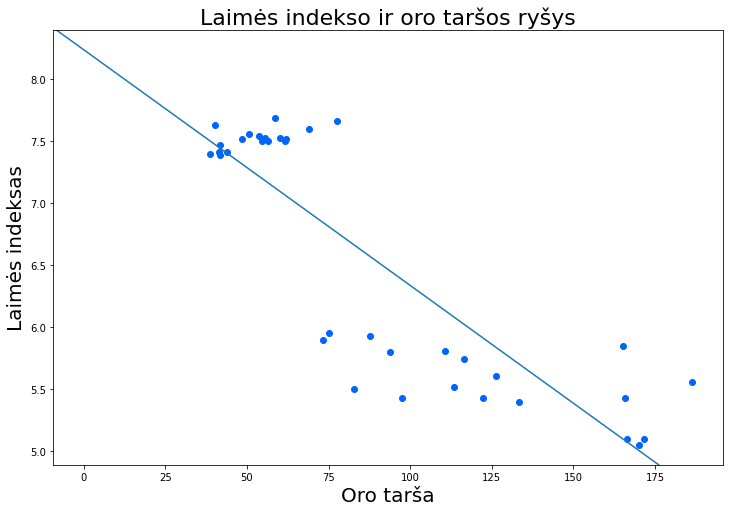

In [63]:
fig, gr = plt.subplots()
gr.scatter(happ_tarsa['Pollution'], happ_tarsa['Happiness index'], marker = "o", color = 'xkcd:bright blue')

gr.set_ylabel('Laimės indeksas', fontsize=20)
gr.set_xlabel('Oro tarša', fontsize=20)
gr.set_title('Laimės indekso ir oro taršos ryšys', fontsize=22, color='black')

fig.set_size_inches(12,8)
plt.axline(xy1=(0,b), slope=m)
plt.show()

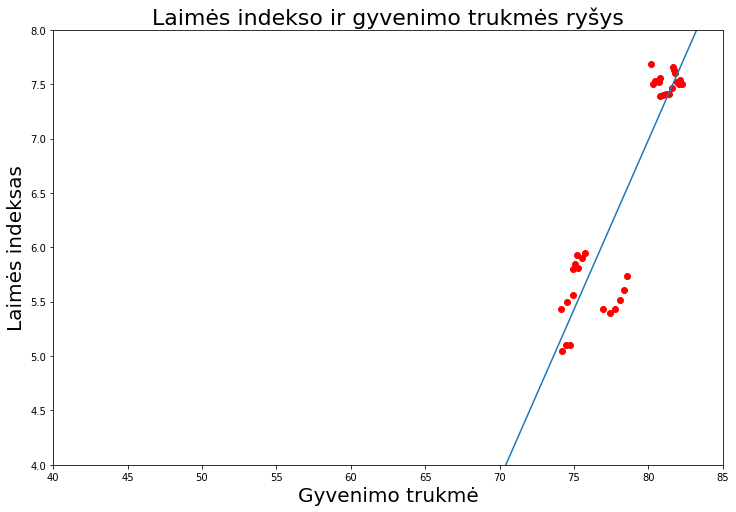

In [64]:
fig, gr = plt.subplots()

gr.scatter(happ_tarsa['Gyv. trukmė'], happ_tarsa['Happiness index'], color = 'red')

gr.set_ylabel('Laimės indeksas', fontsize=20)
gr.set_xlabel('Gyvenimo trukmė', fontsize=20)
gr.set_title('Laimės indekso ir gyvenimo trukmės ryšys', fontsize=22, color='black')

fig.set_size_inches(12,8)

plt.xlim([40, 85])         
plt.ylim([4, 8])

plt.axline(xy1=(0, b1), slope=m1)
plt.show()

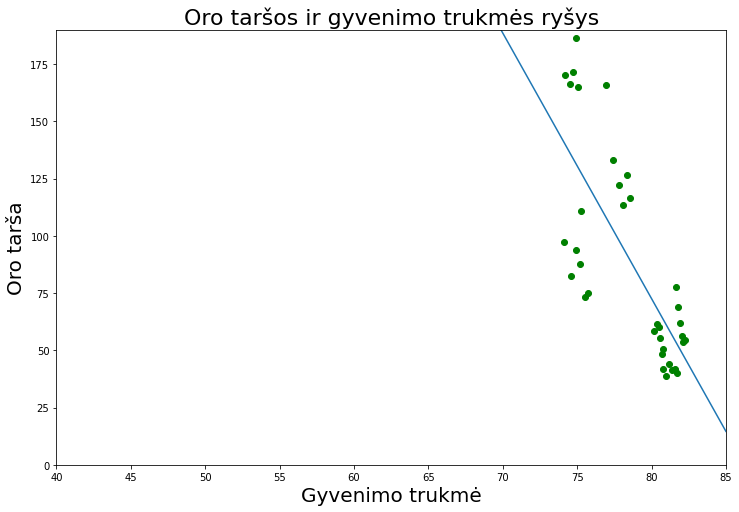

In [65]:
fig, gr = plt.subplots()

gr.scatter(happ_tarsa['Gyv. trukmė'],happ_tarsa['Pollution'], color = 'g')

gr.set_ylabel('Oro tarša', fontsize=20)
gr.set_xlabel('Gyvenimo trukmė', fontsize=20)
gr.set_title('Oro taršos ir gyvenimo trukmės ryšys', fontsize=22, color='black')

fig.set_size_inches(12,8)

plt.xlim([40, 85])         
plt.ylim([0, 190])

plt.axline(xy1=(0,b2), slope=m2)
plt.show()

Nustatyti, ar yra ryšys tarp vidutinės gyvenimo trukmės ir ekonominės laisvės indekso.

In [66]:
ecom_free = pd.read_csv('eco_freedom_2019.csv')
govf = pd.read_csv('gov-forms.csv')

In [67]:
trukme_2019 = trukme[trukme['Year'].isin([2019])]
govf['Country Name'] = govf['Name']
trukme_2019['Country Name'] = trukme_2019['Entity']
govf_ecom = pd.merge(govf, ecom_free, on='Country Name',how='left')
govf_ecom_life = pd.merge(trukme_2019, govf_ecom, on='Country Name',how='left')

C:\Users\modes\AppData\Local\Temp\ipykernel_15852\2930911464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trukme_2019['Country Name'] = trukme_2019['Entity']


In [68]:
govf_ecom_lifeNA = govf_ecom_life.dropna(subset = ['2019 Score'])

In [69]:
final = govf_ecom_lifeNA[['Entity', 'Life expectancy', '2019 Score', 'Constitutional form']].copy()

In [70]:
final.corr()
# Gyv. trukmė / Ekonominės laisvės indeksas - Vidutinis ryšys

Life expectancy  2019 Score
Life expectancy         1.000000    0.622965
2019 Score              0.622965    1.000000

In [71]:
m3, b3 = np.polyfit(final['Life expectancy'],final['2019 Score'], deg=1)

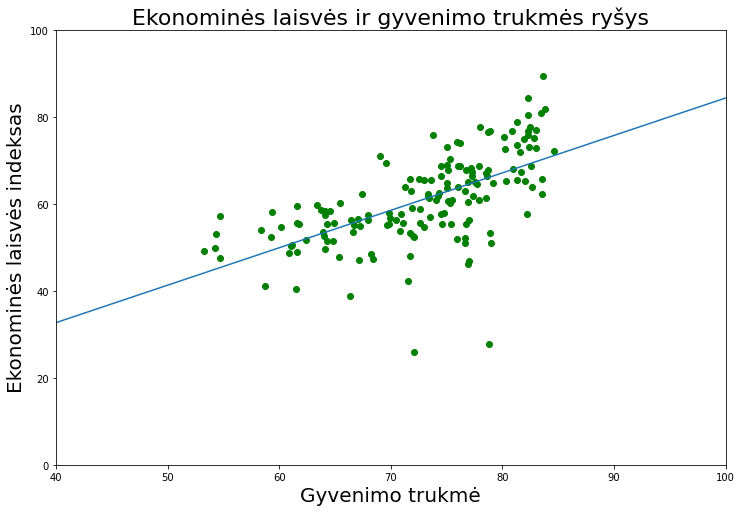

In [72]:
fig, gr = plt.subplots()

gr.scatter(final['Life expectancy'],final['2019 Score'], color = 'g')

gr.set_ylabel('Ekonominės laisvės indeksas', fontsize=20)
gr.set_xlabel('Gyvenimo trukmė', fontsize=20)
gr.set_title('Ekonominės laisvės ir gyvenimo trukmės ryšys', fontsize=22, color='black')

fig.set_size_inches(12,8)

plt.xlim([40, 100])         
plt.ylim([0, 100])

plt.axline(xy1=(0,b3), slope=m3)
plt.show()